# American companies Bankruptcy prediction

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Loading Data

In [2]:
df= pd.read_csv('/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv')

# Exploratory data analysis (EDA)

In [3]:
df.head()

company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467  

[5 rows x 21 columns]

## Summary statistics

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

summary(df)

data shape: (78682, 21)


data type  #missing  %missing  #unique       min         max  \
company_name    object         0       0.0     8971       NaN         NaN   
status_label    object         0       0.0        2       NaN         NaN   
year             int64         0       0.0       20    1999.0      2018.0   
X1             float64         0       0.0    65895     -7.76    169662.0   
X2             float64         0       0.0    65690  -366.645    374623.0   
X3             float64         0       0.0    36010       0.0     28430.0   
X4             float64         0       0.0    59060  -21913.0     81730.0   
X5             float64         0       0.0    38898       0.0     62567.0   
X6             float64         0       0.0    55550  -98696.0    104821.0   
X7             float64         0       0.0    49577    -0.006     65812.0   
X8             float64         0       0.0    77580    0.0001  1073390.54   
X9             float64         0       0.0    68596 -1964.999    511729.0   
X10            float64         0       0.0    71521     0.001    531864.0   
X11            float64         0       0.0    39741    -0.023    166250.0   
X12            float64         0       0.0    56949  -25913.0     71230.0   
X13            float64         0       0.0    64952  -21536.0    137106.0   
X14            float64         0       0.0    58685     0.001    116866.0   
X15            float64         0       0.0    72062 -102362.0    402089.0   
X16            float64         0       0.0    68596 -1964.999    511729.0   
X17            float64         0       0.0    64640     0.001    337980.0   
X18            float64         0       0.0    70840  -317.197    481580.0   

             first value second value third value  
company_name         C_1          C_1         C_1  
status_label       alive        alive       alive  
year                1999         2000        2001  
X1               511.267      485.856     436.656  
X2               833.107      713.811     526.477  
X3                18.373       18.577      22.496  
X4                89.031       64.367      27.207  
X5               336.018       320.59     286.588  
X6                35.163       18.531     -58.939  
X7               128.348      115.187      77.528  
X8              372.7519      377.118    364.5928  
X9              1024.333      874.255     638.721  
X10              740.998      701.854     710.199  
X11              180.447      179.987     217.699  
X12               70.658        45.79       4.711  
X13              191.226      160.444     112.244  
X14              163.816      125.392     150.464  
X15              201.026      204.065     139.603  
X16             1024.333      874.255     638.721  
X17              401.483      361.642     399.964  
X18              935.302      809.888     611.514

According to the summary, the US Company Bankruptcy DataFrame has 78,682 rows and 21 columns. Here's how the data was analysed:

1. **Data Types:** The DataFrame contains columns with various data types, such as `object`, `int64`, and `float64`.

2. **Missing Values:** There are no missing values in any of the columns as indicated by the `%missing` column showing 0.0% missing values for all columns.

3. **Unique Values:** The number of unique values for each column varies. For instance, `company_name` has 8,971 unique values, `status_label` has 2 unique values, and other columns have different numbers of unique values.

4. **Summary Statistics:** The `describe` function provides statistical summary for numerical columns. It includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

5. **Example Values:** The DataFrame displays the first three values for each column under the columns `first value`, `second value`, and `third value`. For instance, `company_name` has the values 'C_1', 'C_1', and 'C_1' for the first three rows.(Companies' names are coded for security reasons.)


# Target Column Distribution

In [5]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print("Alive Ratio:", alive_ratio)
print("Failed Ratio:", failed_ratio)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


- The "Alive Ratio" is approximately **0.934**, which means that around **93.4%** of the samples in the dataset belong to the "alive" class (e.g., companies that have not failed or gone bankrupt).

- The "Failed Ratio" is approximately **0.066**, which means that only about **6.6% of** the samples in the dataset belong to the "failed" class (e.g., companies that have experienced bankruptcy or failure).

This significant class imbalance can have implications for building predictive models. When the dataset is **highly imbalanced**, models may be biased towards the majority class (in this case, "alive") and may not perform well in identifying the minority class (in this case, "failed").

To address this issue, you may consider employing techniques such as:

- **Class Balancing Techniques:** Using methods like oversampling the minority class (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling the majority class to balance the class distribution.

- **Different Evaluation Metrics:** Instead of accuracy, consider using evaluation metrics like precision, recall, F1-score, or area under the ROC curve (AUC), which are more suitable for imbalanced datasets.

- **Algorithm Selection:** Choose algorithms that are less sensitive to class imbalance, such as ensemble methods (e.g., Random Forest, Gradient Boosting) or anomaly detection methods.

- **Cost-sensitive Learning:** Assigning different misclassification costs for each class during model training to reflect the importance of correctly predicting the minority class.

## Outliers

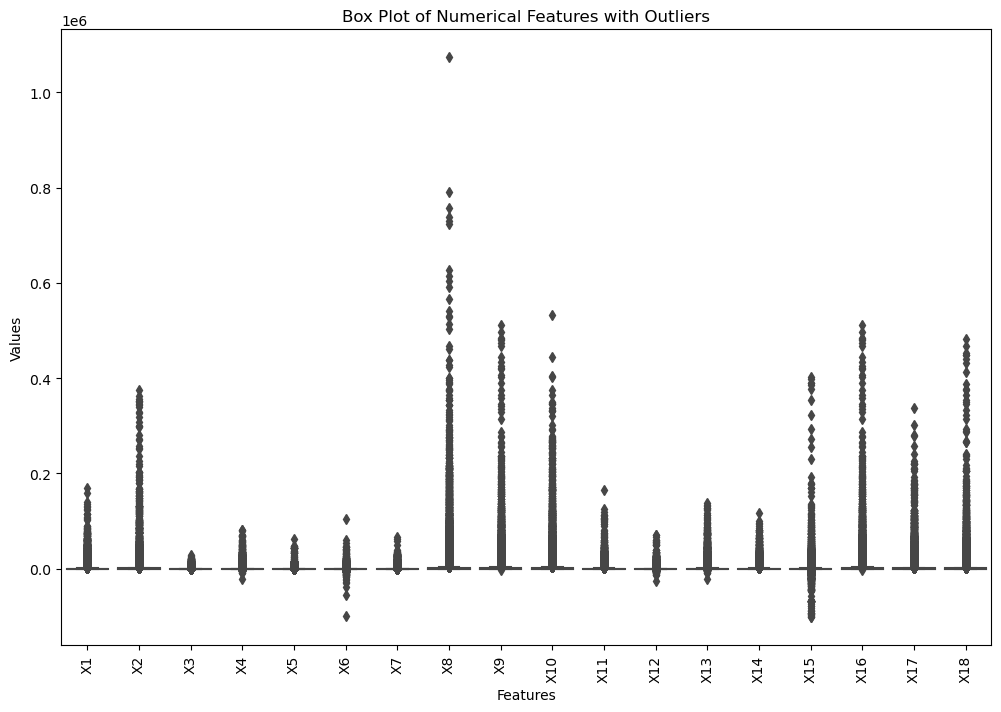

In [6]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Well Thats alot!!! Dealing with outliers is crucial to ensure that they do not adversely affect the performance of your predictive models. Outliers can skew the distribution of data and impact the model's ability to generalize to unseen data. Here are some strategies to handle outliers in your dataset:

- Remove Outliers: One straightforward approach is to remove the outliers from the dataset. However, this should be done with caution, as outliers may contain valuable information or represent rare but significant events. Removing too many outliers can lead to loss of important data.
- Outlier Detection Models: Use outlier detection algorithms (e.g., Isolation Forest, One-Class SVM) to identify and mark outliers. You can then choose whether to remove them or treat them separately during analysis.
- Transform Data: Instead of removing outliers, you can apply data transformations to reduce their impact. Common transformations include log-transform, square-root transform, or Box-Cox transform. These transformations can make the data more normally distributed and reduce the effect of extreme values.

## Correlation Matrix

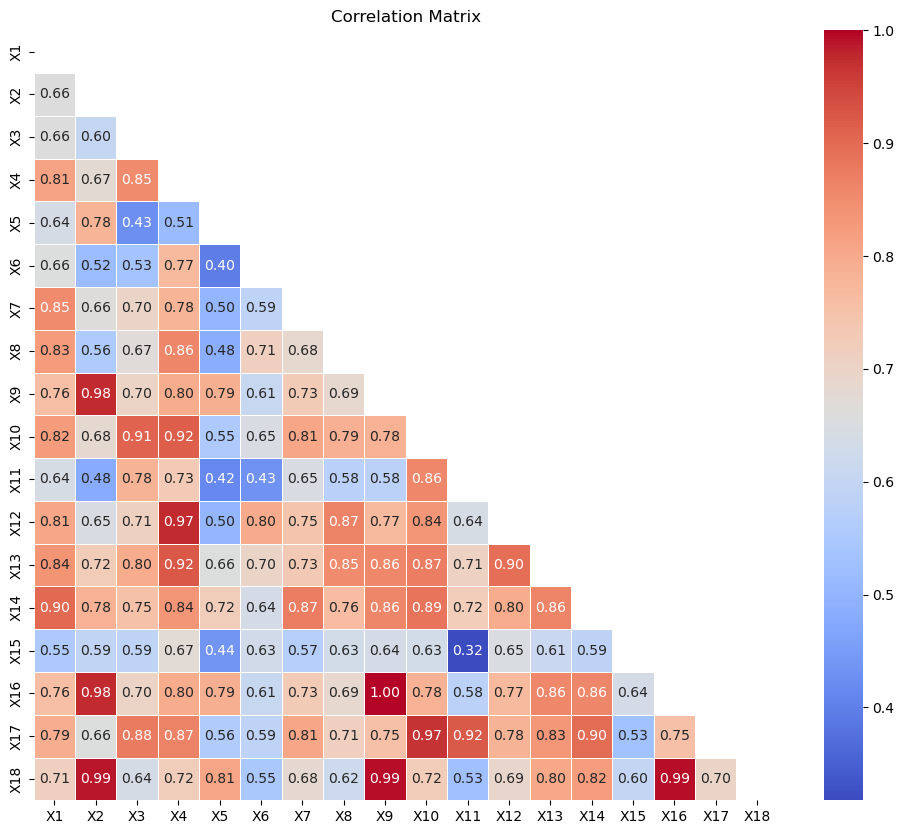

In [7]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Pair Plot

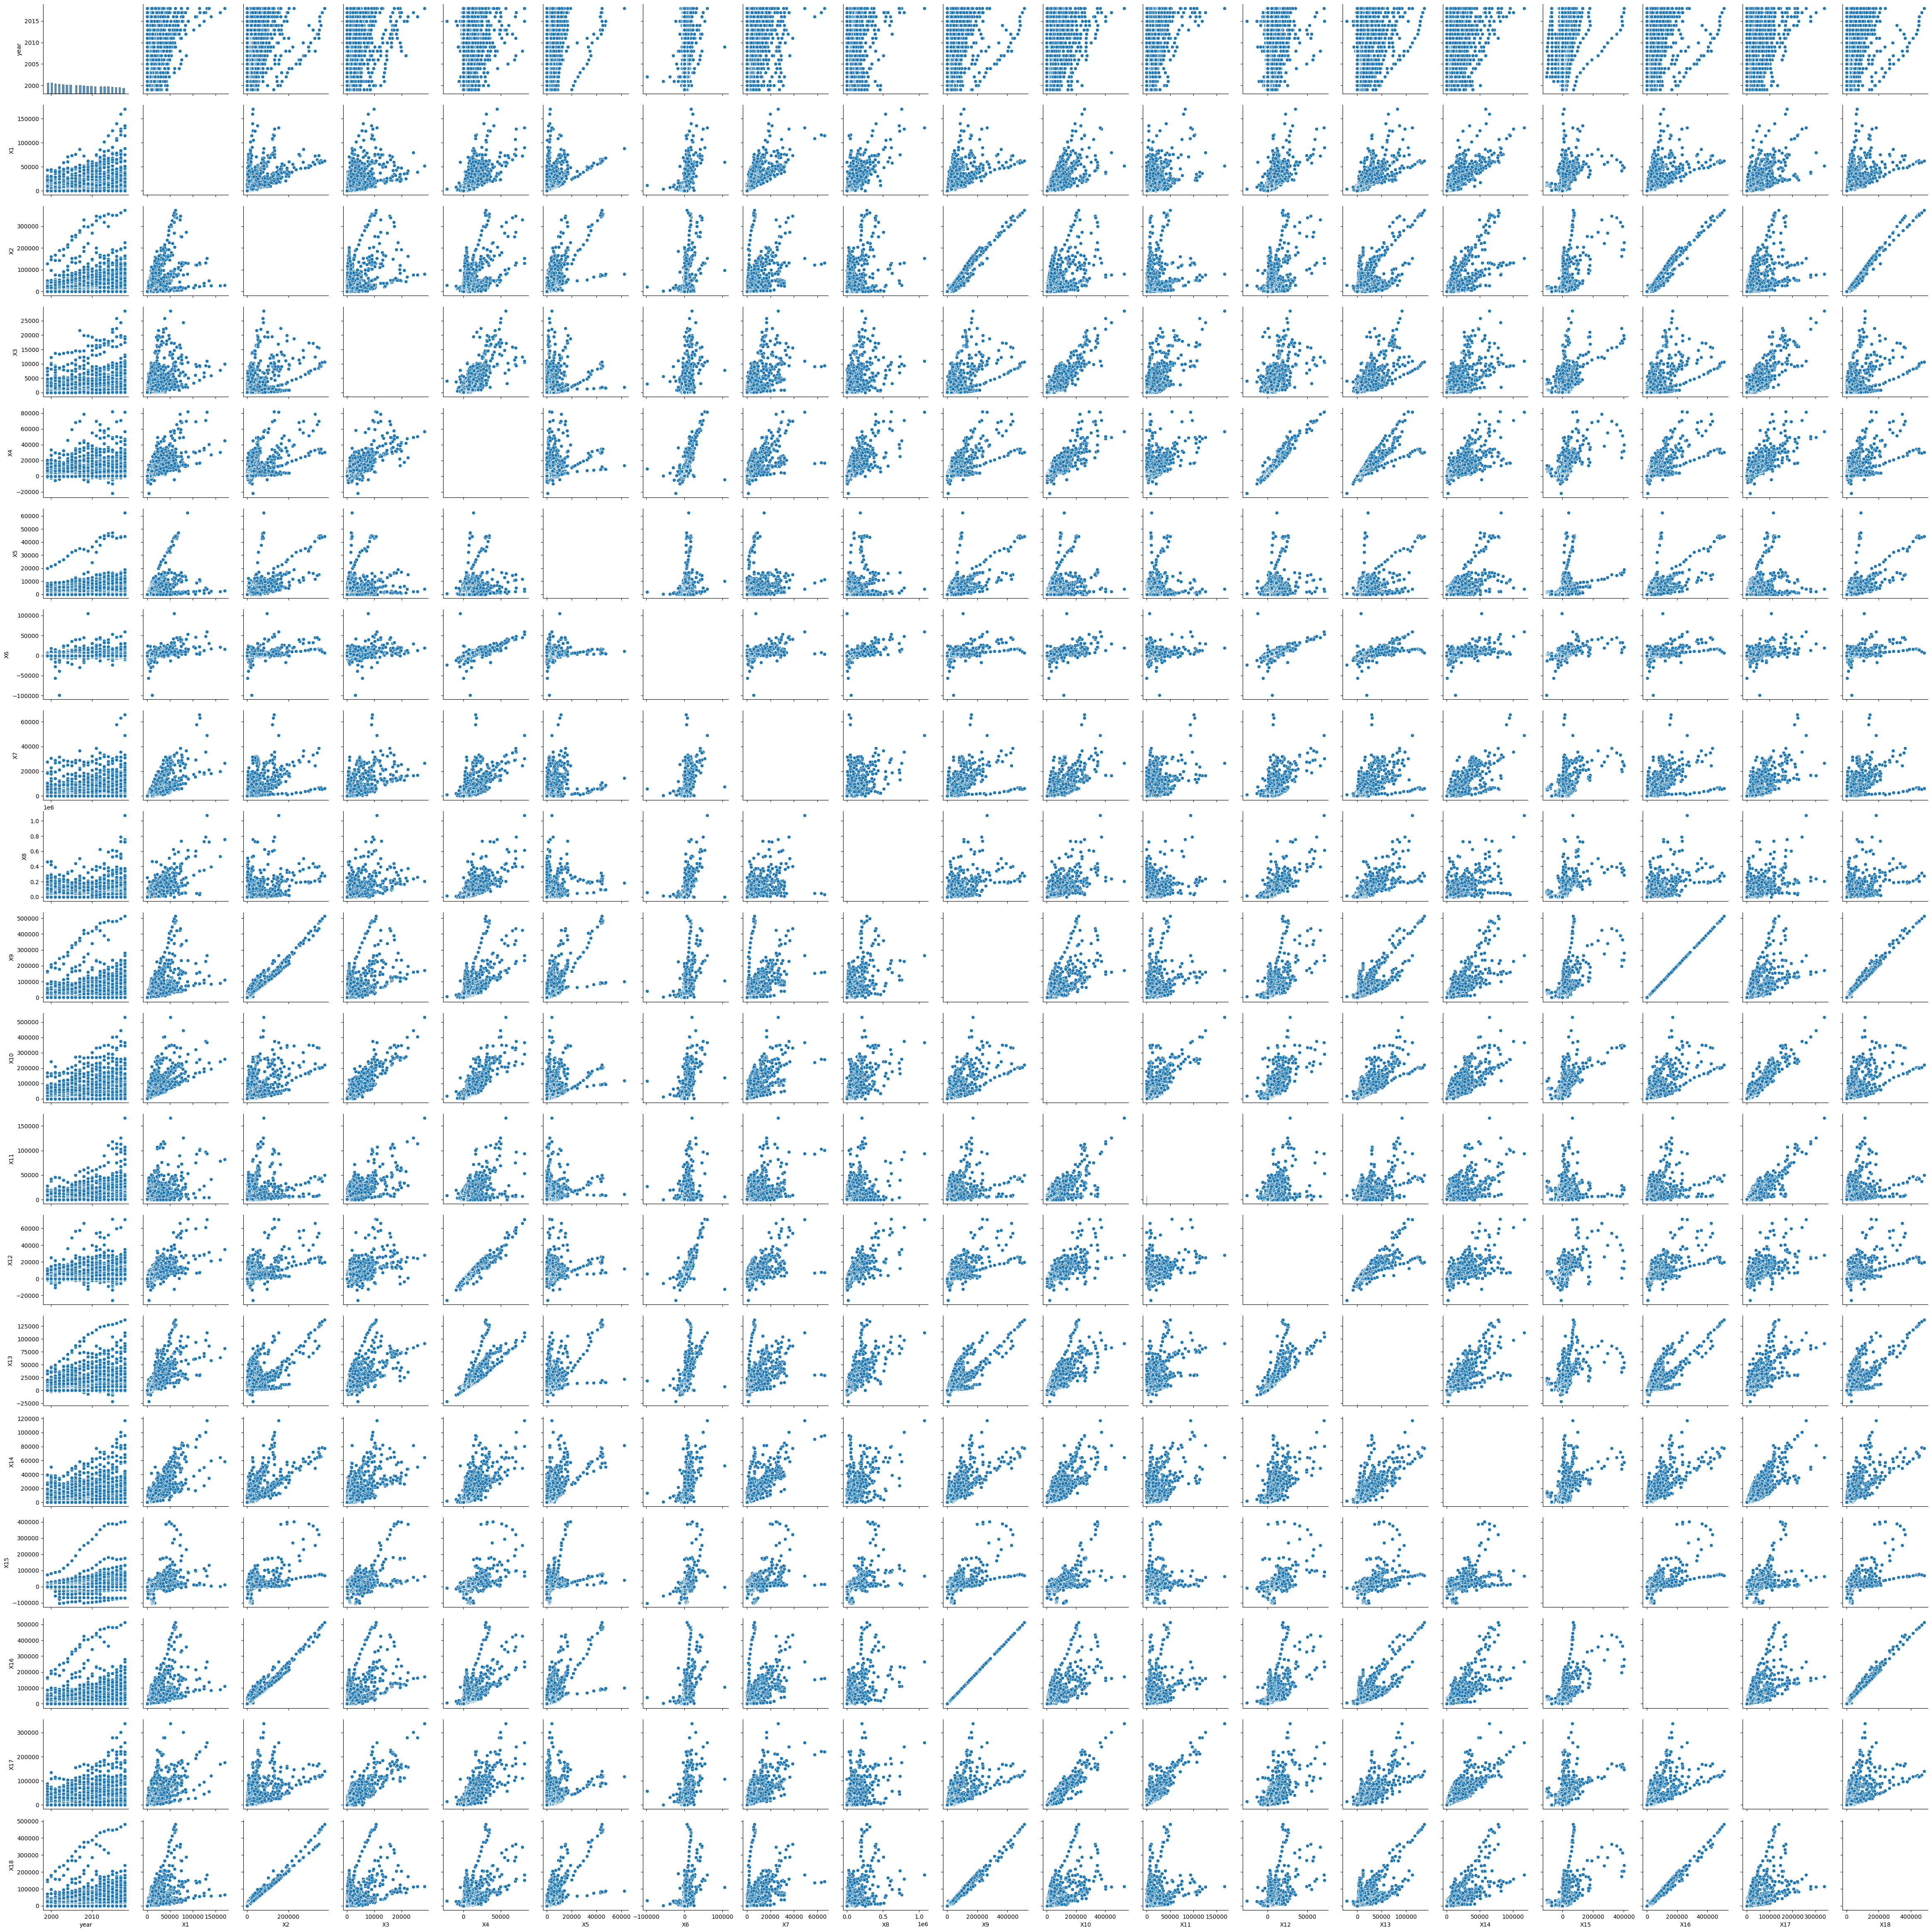

In [8]:
sns.pairplot(df)

# Pre-Processing 1

In [9]:
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
X = df.drop(columns=['company_name', 'status_label'])
y = df['status_label']

- Convert the categorical target variable 'status_label' to numerical labels (1 for 'alive' and 0 for 'failed').
- Create the feature matrix X, excluding the 'company_name' and 'status_label' columns, to be used for training the machine learning model.
- Set the target variable y as the numerical 'status_label', representing the labels for the training dataset.

After these preprocessing steps, you can proceed with model training using X as the feature matrix and y as the target variable.

# Features Selection

# Using LogisticRegression and RandomForestRegressor

We are performing feature selection using two different algorithms: Logistic Regression and Random Forests. The goal of feature selection is to identify a subset of relevant features from the original dataset that will be used for model training. By selecting only the most important features, we aim to reduce the complexity of the model, improve its performance, and potentially avoid overfitting.

In [10]:
logit_model = LogisticRegression()

logit_model.fit(X, y)
logit_feature_importances = pd.Series(logit_model.coef_[0], index=X.columns).abs()
selected_features_logit = logit_feature_importances.nlargest(10).index.tolist()

rf_model = RandomForestClassifier()

rf_model.fit(X, y)
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).abs()
selected_features_rf = rf_feature_importances.nlargest(10).index.tolist()

df_logit_selected = df[['company_name', 'status_label'] + selected_features_logit]
df_rf_selected = df[['company_name', 'status_label'] + selected_features_rf]
print("Selected features using logistic regression:", selected_features_logit)
print("Selected features using random forests:", selected_features_rf)

Selected features using logistic regression: ['year', 'X5', 'X1', 'X14', 'X12', 'X3', 'X8', 'X7', 'X17', 'X11']
Selected features using random forests: ['X8', 'X15', 'X3', 'X1', 'X7', 'X17', 'X13', 'X10', 'X6', 'X14']


In [11]:
selected_features_logit = ['year', 'X5', 'X1', 'X14', 'X12', 'X3', 'X8', 'X7', 'X17', 'X11']
selected_features_rf = ['X8', 'X15', 'X3', 'X1', 'X17', 'X7', 'X13', 'X10', 'X14', 'X6']

df_logit_selected = df[['status_label'] + selected_features_logit]
df_rf_selected = df[['status_label'] + selected_features_rf]

print("New dataset with selected features from logistic regression:")
print(df_logit_selected.head())

print("\nNew dataset with selected features from random forests:")
print(df_rf_selected.head())

df_logit_selected.to_csv('logit_selected_features_dataset.csv', index=False)
df_rf_selected.to_csv('rf_selected_features_dataset.csv', index=False)

print("Datasets saved to CSV files.")

New dataset with selected features from logistic regression:
   status_label  year       X5       X1      X14     X12      X3        X8  \
0             1  1999  336.018  511.267  163.816  70.658  18.373  372.7519   
1             1  2000  320.590  485.856  125.392  45.790  18.577  377.1180   
2             1  2001  286.588  436.656  150.464   4.711  22.496  364.5928   
3             1  2002  259.954  396.412  203.575   3.573  27.172  143.3295   
4             1  2003  247.245  432.204  131.261  20.811  26.680  308.9071   

        X7      X17      X11  
0  128.348  401.483  180.447  
1  115.187  361.642  179.987  
2   77.528  399.964  217.699  
3   66.322  391.633  164.658  
4  104.661  407.608  248.666  

New dataset with selected features from random forests:
   status_label        X8      X15      X3       X1      X17       X7  \
0             1  372.7519  201.026  18.373  511.267  401.483  128.348   
1             1  377.1180  204.065  18.577  485.856  361.642  115.187   
2       

In [12]:
df_rf_selected.shape, df_logit_selected.shape

((78682, 11), (78682, 11))

# Pre-Processing 2

In [13]:
# X_logit = df_logit_selected.drop('status_label', axis=1)
# y_logit = df_logit_selected['status_label']

# scaler = StandardScaler()
# X_logit_scaled = scaler.fit_transform(X_logit)

# X_logit_train, X_logit_test, y_logit_train, y_logit_test = train_test_split(X_logit_scaled, y_logit, test_size=0.2, random_state=42)

# Model Building

# RandomForestClassifier

Random Forest Accuracy: 93.51%
Confusion Matrix:
[[   57  1011]
 [   10 14659]]


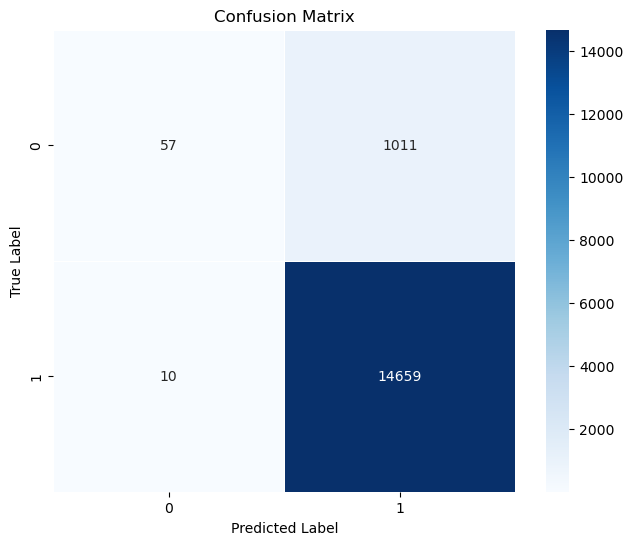

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.05      0.10      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.94     15737
   macro avg       0.89      0.53      0.53     15737
weighted avg       0.93      0.94      0.91     15737



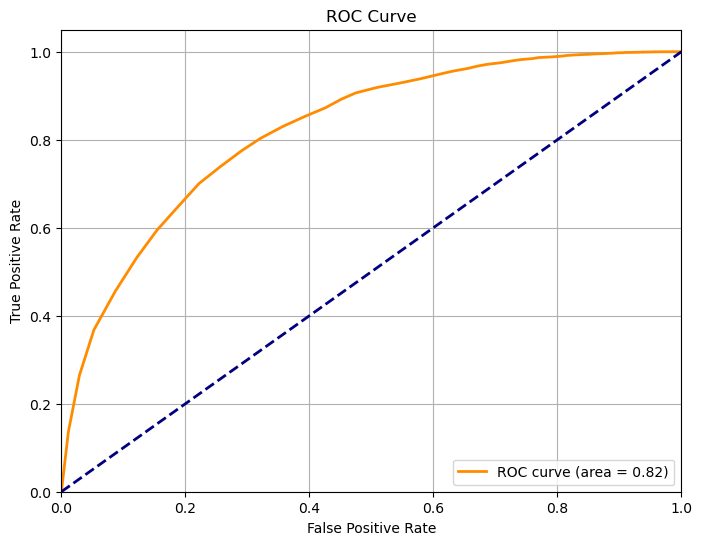

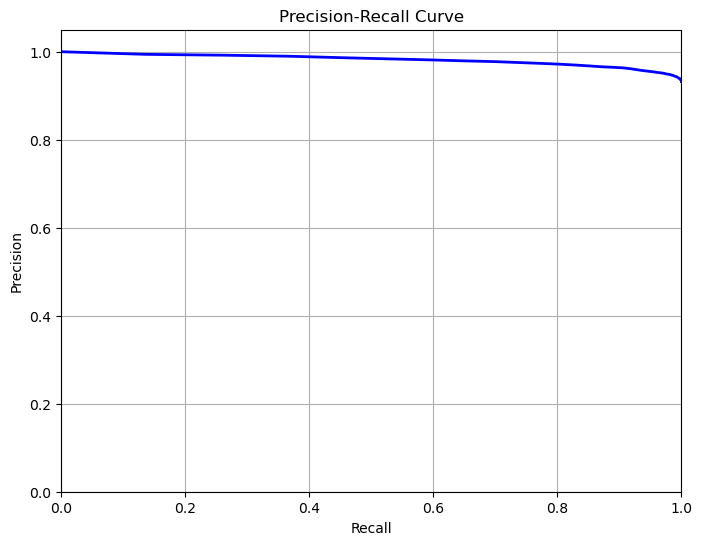


Cross-Validation Scores:
Fold 1: 93.28%
Fold 2: 93.25%
Fold 3: 93.16%
Fold 4: 93.16%
Fold 5: 93.41%
Average Cross-Validation Score: 93.25%


In [14]:
X_rf = df_rf_selected.drop('status_label', axis=1)
y_rf = df_rf_selected['status_label']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf_train, y_rf_train)
y_rf_pred = rf_model.predict(X_rf_test)
rf_accuracy = accuracy_score(y_rf_test, y_rf_pred)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr)

# ROC Curve and AUC-ROC
y_rf_scores = rf_model.predict_proba(X_rf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_rf_test, y_rf_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_rf_test, y_rf_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#Cross-Validation Scores
cv_scores = cross_val_score(rf_model, X_rf, y_rf, cv=5)
print("\nCross-Validation Scores:")
for i, score in enumerate(cv_scores):
    print("Fold {}: {:.2f}%".format(i + 1, score * 100))

# Average Cross-Validation Score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score: {:.2f}%".format(average_cv_score * 100))

## Support Vector Machine (SVC)

In [15]:
X_rf = df_rf_selected.drop('status_label', axis=1)
y_rf = df_rf_selected['status_label']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_rf_train, y_rf_train)
y_rf_pred = svm_model.predict(X_rf_test)

svm_accuracy = accuracy_score(y_rf_test, y_rf_pred)
print("SVM Accuracy: {:.2f}%".format(svm_accuracy * 100))

# Confusion Matrix
cm_svm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm_svm)

# Classification Report
cr_svm = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr_svm)

SVM Accuracy: 93.21%
Confusion Matrix:
[[    0  1068]
 [    0 14669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.47      0.50      0.48     15737
weighted avg       0.87      0.93      0.90     15737



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [16]:
X_logit = df_logit_selected.drop('status_label', axis=1)
y_logit = df_logit_selected['status_label']
X_logit_train, X_logit_test, y_logit_train, y_logit_test = train_test_split(X_logit, y_logit, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_logit_train, y_logit_train)

y_logit_pred = dt_model.predict(X_logit_test)

dt_accuracy = accuracy_score(y_logit_test, y_logit_pred)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

# Confusion Matrix
cm_dt = confusion_matrix(y_logit_test, y_logit_pred)
print("Confusion Matrix:")
print(cm_dt)

# Classification Report
cr_dt = classification_report(y_logit_test, y_logit_pred)
print("Classification Report:")
print(cr_dt)

Decision Tree Accuracy: 89.47%
Confusion Matrix:
[[  277   791]
 [  866 13803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1068
           1       0.95      0.94      0.94     14669

    accuracy                           0.89     15737
   macro avg       0.59      0.60      0.60     15737
weighted avg       0.90      0.89      0.90     15737



## LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_logit = df_logit_selected.drop('status_label', axis=1)
y_logit = df_logit_selected['status_label']

X_logit_train, X_logit_test, y_logit_train, y_logit_test = train_test_split(X_logit, y_logit, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_logit_train, y_logit_train)

y_logit_pred = lr_model.predict(X_logit_test)

lr_mse = mean_squared_error(y_logit_test, y_logit_pred)
print("Linear Regression Mean Squared Error:", lr_mse)

Linear Regression Mean Squared Error: 0.06267585613005543


Because this is not a Linear Regression problem, the score is quite low.